In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#| default_exp examples

In [ ]:
#| export 
import numpy as np
import imutils
import cv2 as cv
from matplotlib import pyplot as plt

from nbdev.showdoc import *
from rough.data import *
from rough.profile import *
from rough.areal import *

When working with raster data we generally want to perform the following workflow:
1. Remove the best fit plane and normalize the data
2. Remove the underlying form by fitting a Degree 3 Polynomial
3. Apply a high frequency gaussian filter to attenuate noise
4. Generate our rotational profiles and sections
5. Calculate our parameters.
6. Analyze the data. 

First let's get some data

In [ ]:
image = np.loadtxt('BYGS008_top_segment_500samp_10cm_interp089.txt')

Let's have a look

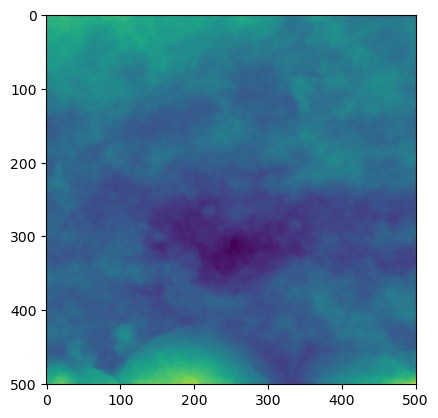

In [ ]:
plt.imshow(image)
plt.show()

Okay now let's process it.

In [ ]:
levelled_image     = plane_level(image)
remove_form_image  = remove_form(levelled_image)

data     = smooth_image(remove_form_image)
sections = gen_sections(data)
profiles = gen_rot_prof(data)
(data.shape,sections.shape,profiles.shape)

NameError: name 'plane_level' is not defined

Our processed datta should look a little different.

In [ ]:
plt.imshow(data)
plt.show()

Looks good, let's get our profile parameters. We'll use the default settings, so our profiles move down the 'rows' of the image/array/raster. We'll also generate our rotational profiles and parameters. 

In [ ]:
image_ra = Ra(image)
image_rms = Rms(image)
rotational_profiles= gen_rot_prof(image)
image_rot_ra = Ra(rotational_profiles)
image_rot_rms = Rms(rotational_profiles)

Let's visualise them. First we'll make some boxplots to look at the distribution and find any outliers

In [ ]:
plt.figure()
plt.subplot(221)
plt.boxplot(image_ra)
plt.title('Image Ra')

plt.subplot(222)
plt.boxplot(image_rms)
plt.title('Image Rms')

plt.subplot(223)
plt.boxplot(image_rot_ra)
plt.title('Image Rotational Ra')

plt.subplot(224)
plt.boxplot(image_rot_rms)
plt.title('Image Rotational Rms')
plt.tight_layout()

Let's try a scatter plot, Ra/Rms against location of the profile and rotational Ra/Rms against degree

In [ ]:
plt.figure()

plt.subplot(221)
plt.scatter(range(len(image_ra)),image_ra)
plt.title('Image Ra')

plt.subplot(222)
plt.scatter(range(len(image_rms)),image_rms)
plt.title('Image Rms')

plt.subplot(223)
plt.scatter(range(len(image_rot_ra)),image_rot_ra)
plt.title('Image Rotational Ra')

plt.subplot(224)
plt.scatter(range(len(image_rot_rms)),image_rot_rms)
plt.title('Image Rotational Rms')
plt.tight_layout()

How about plotting Ra against Rms?

In [ ]:
plt.figure()
plt.subplot(121)
plt.scatter(image_ra,image_rms)
plt.title('Image Ra/Rms')

plt.subplot(122)
plt.scatter(image_rot_ra,image_rot_rms)
plt.title('Image Rotational Ra/Rms')

plt.tight_layout()

In [ ]:
#| hide
from nbdev import nbdev_export
nbdev_export()